In [128]:
# !pip install timefold

   ---------------------------------------- 0.0/16.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.7 MB 1.4 MB/s eta 0:00:13
   ---------------------------------------- 0.2/16.7 MB 3.1 MB/s eta 0:00:06
   - -------------------------------------- 0.4/16.7 MB 3.8 MB/s eta 0:00:05
   - -------------------------------------- 0.7/16.7 MB 4.3 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/16.7 MB 4.8 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/16.7 MB 4.9 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/16.7 MB 3.7 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/16.7 MB 3.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.5/16.7 MB 3.6 MB/s eta 0:00:05
   ---- ----------------------------------- 1.8/16.7 MB 3.8 MB/s eta 0:00:04
   ---- ----------------------------------- 2.0/16.7 MB 4.0 MB/s eta 0:00:04
   ----- ---------------------------------- 2.2/16.7 MB 4.0 MB/s eta 0:00:04
   ---

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timefold import timefold

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit

ModuleNotFoundError: No module named 'timefold'

In [ ]:
df_train = pd.read_csv('train.csv')

In [39]:
df_train

,volume_kg,distribution_channel,customer,brand,channel,store_format,category,year,month
0,460.026585,0,1,1,FOOD SERVICE,3,3,2010,1
1,456.944328,0,1,1,FOOD SERVICE,3,3,2010,2
2,926.790243,0,1,1,FOOD SERVICE,3,3,2010,3
3,762.549167,0,1,1,FOOD SERVICE,3,3,2010,4
4,1132.060704,0,1,1,FOOD SERVICE,3,3,2010,5
...,...,...,...,...,...,...,...,...,...
5788,938.077344,1,15,1,DISCOUNTS,1,10,2019,12
5789,464.815891,1,15,1,DISCOUNTS,1,10,2020,1
5790,471.421097,1,15,1,DISCOUNTS,1,10,2020,2
5791,12611.841468,1,15,1,DISCOUNTS,1,10,2020,3


In [40]:
df_train["serie_name"] = pd.concat([df_train["distribution_channel"], df_train["customer"], df_train["brand"], df_train["channel"], df_train["store_format"], df_train["category"]], axis=1).apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}_{x[3]}_{x[4]}_{x[5]}", axis=1)
df_train

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10408\176964499.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_train["serie_name"] = pd.concat([df_train["distribution_channel"], df_train["customer"], df_train["brand"], df_train["channel"], df_train["store_format"], df_train["category"]], axis=1).apply(lambda x: f"{x[0]}_{x[1]}_{x[2]}_{x[3]}_{x[4]}_{x[5]}", axis=1)


,volume_kg,distribution_channel,customer,brand,channel,store_format,category,year,month,serie_name
0,460.026585,0,1,1,FOOD SERVICE,3,3,2010,1,0_1_1_FOOD SERVICE_3_3
1,456.944328,0,1,1,FOOD SERVICE,3,3,2010,2,0_1_1_FOOD SERVICE_3_3
2,926.790243,0,1,1,FOOD SERVICE,3,3,2010,3,0_1_1_FOOD SERVICE_3_3
3,762.549167,0,1,1,FOOD SERVICE,3,3,2010,4,0_1_1_FOOD SERVICE_3_3
4,1132.060704,0,1,1,FOOD SERVICE,3,3,2010,5,0_1_1_FOOD SERVICE_3_3
...,...,...,...,...,...,...,...,...,...,...
5788,938.077344,1,15,1,DISCOUNTS,1,10,2019,12,1_15_1_DISCOUNTS_1_10
5789,464.815891,1,15,1,DISCOUNTS,1,10,2020,1,1_15_1_DISCOUNTS_1_10
5790,471.421097,1,15,1,DISCOUNTS,1,10,2020,2,1_15_1_DISCOUNTS_1_10
5791,12611.841468,1,15,1,DISCOUNTS,1,10,2020,3,1_15_1_DISCOUNTS_1_10


In [41]:
print("Number of unique time series: ", df_train["serie_name"].nunique())

Number of unique time series:  48


Example plot of one serie

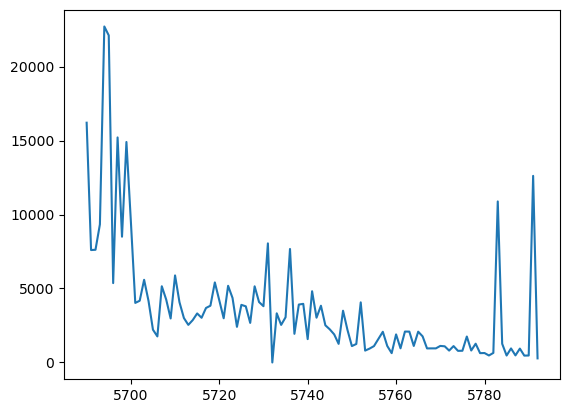

In [43]:
ts1 = df_train[df_train["serie_name"] == "1_15_1_DISCOUNTS_1_10"]
plt.plot(ts1.index, ts1["volume_kg"])

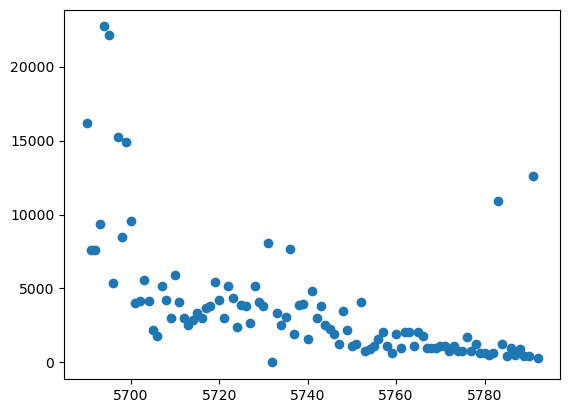

In [51]:
plt.scatter(ts1.index, ts1["volume_kg"])

In [47]:
ts1.drop(["distribution_channel", "customer", "brand", "channel", "store_format", "category"], axis=1, inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_10408\2544535459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts1.drop(["distribution_channel", "customer", "brand", "channel", "store_format", "category"], axis=1, inplace=True)


In [48]:
ts1

,volume_kg,year,month,serie_name
5690,16204.744324,2010,1,1_15_1_DISCOUNTS_1_10
5691,7598.342304,2010,3,1_15_1_DISCOUNTS_1_10
5692,7617.416265,2010,4,1_15_1_DISCOUNTS_1_10
5693,9333.721886,2010,5,1_15_1_DISCOUNTS_1_10
5694,22708.317207,2010,7,1_15_1_DISCOUNTS_1_10
...,...,...,...,...
5788,938.077344,2019,12,1_15_1_DISCOUNTS_1_10
5789,464.815891,2020,1,1_15_1_DISCOUNTS_1_10
5790,471.421097,2020,2,1_15_1_DISCOUNTS_1_10
5791,12611.841468,2020,3,1_15_1_DISCOUNTS_1_10


In [56]:
# Convert to datetime
df_train['date'] = pd.to_datetime(df_train[['year', 'month']].assign(day=1))
df_train.set_index(["serie_name",'date'], inplace=True)

In [58]:
df_train.drop(["distribution_channel", "customer", "brand", "channel", "store_format", "category","year", "month"], axis=1, inplace=True)

In [67]:
df_train

volume_kg
serie_name             date                    
0_1_1_FOOD SERVICE_3_3 2010-01-01    460.026585
                       2010-02-01    456.944328
                       2010-03-01    926.790243
                       2010-04-01    762.549167
                       2010-05-01   1132.060704
...                                         ...
1_15_1_DISCOUNTS_1_10  2019-12-01    938.077344
                       2020-01-01    464.815891
                       2020-02-01    471.421097
                       2020-03-01  12611.841468
                       2020-04-01    277.491080

[5793 rows x 1 columns]

In [68]:
idxs = df_train.index.get_level_values(0).unique()
idxs

Index(['0_1_1_FOOD SERVICE_3_3', '0_1_1_FOOD SERVICE_3_6',
       '0_1_1_FOOD SERVICE_3_10', '0_1_2_FOOD SERVICE_3_10',
       '0_4_0_FOOD SERVICE_3_10', '0_4_1_FOOD SERVICE_3_6',
       '0_4_1_FOOD SERVICE_3_10', '0_4_2_FOOD SERVICE_3_10',
       '0_4_3_FOOD SERVICE_3_10', '0_5_0_FOOD SERVICE_3_10',
       '0_5_1_FOOD SERVICE_3_3', '0_5_1_FOOD SERVICE_3_6',
       '0_5_1_FOOD SERVICE_3_10', '0_5_2_FOOD SERVICE_3_10',
       '0_5_3_FOOD SERVICE_3_10', '0_6_0_FOOD SERVICE_3_10',
       '0_6_1_FOOD SERVICE_3_6', '0_6_1_FOOD SERVICE_3_10',
       '0_6_2_FOOD SERVICE_3_10', '0_6_3_FOOD SERVICE_3_10',
       '0_8_0_FOOD SERVICE_3_10', '0_8_1_FOOD SERVICE_3_3',
       '0_8_1_FOOD SERVICE_3_6', '0_8_1_FOOD SERVICE_3_10',
       '0_8_2_FOOD SERVICE_3_10', '0_8_3_FOOD SERVICE_3_10',
       '1_2_1_DISCOUNTS_1_10', '1_2_2_DISCOUNTS_1_10',
       '1_10_1_MODERN TRADE_2_6', '1_10_1_MODERN TRADE_2_10',
       '1_10_2_MODERN TRADE_2_10', '1_11_1_MODERN TRADE_2_3',
       '1_11_1_MODERN TRADE_2_6', '1

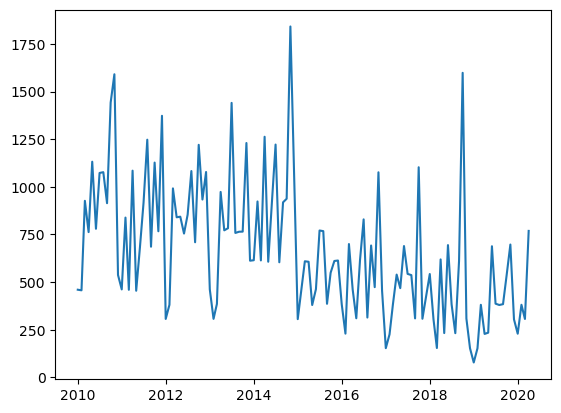

In [72]:
# for i in range(len(idxs)):
#     plt.plot(df_train.loc[idxs[i]].index, df_train.loc[idxs[i]]["volume_kg"]);
plt.plot(df_train.loc[idxs[0]].index, df_train.loc[idxs[0]]["volume_kg"]);

Test stationarity

In [73]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_train.loc[idxs[0]]["volume_kg"])

print("ADF test statistic: ", adf_test[0])
print("p-value: ", adf_test[1])

ADF test statistic:  -1.2768726680639844
p-value:  0.6396855691400679


In [97]:
p_values = np.zeros(len(idxs))

for i in range(len(idxs)):
    tmp = adfuller(df_train.loc[idxs[i]]["volume_kg"])
    p_values[i] = tmp[1]

print("p-value: ", np.mean(p_values))

p-value:  0.504058643232513


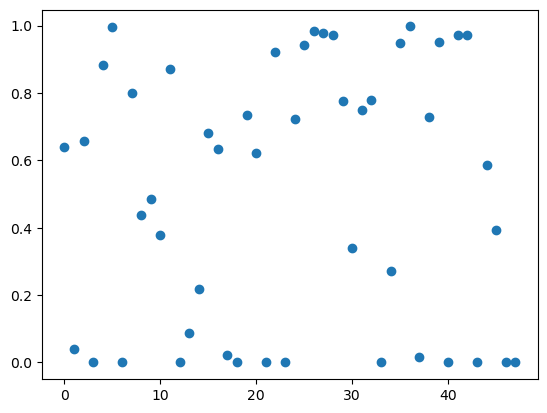

In [85]:
plt.scatter(range(len(idxs)), p_values)

Since a lot of p-values are > 0.05, we cinclude that the time series are not stationary


---
## Making stationary

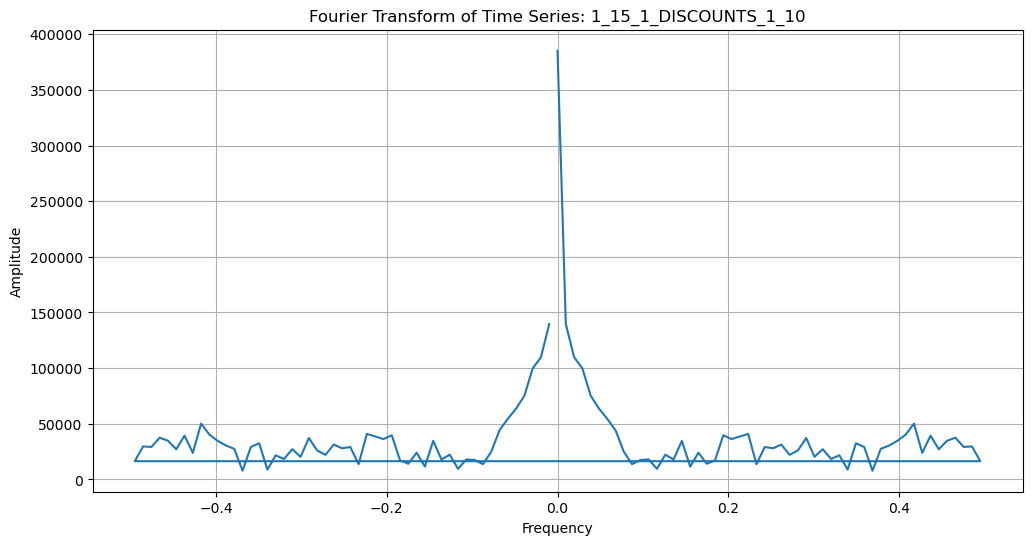

In [87]:
#Fourier transform:


from scipy.fftpack import fft
# Select one time series
ts1 = df_train.loc['1_15_1_DISCOUNTS_1_10']

# Perform Fourier Transform
volume_kg = ts1['volume_kg'].values
fft_result = fft(volume_kg)

# Calculate frequencies
n = len(volume_kg)
freq = np.fft.fftfreq(n)

# Plot the Fourier Transform results
plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(fft_result))
plt.title('Fourier Transform of Time Series: 1_15_1_DISCOUNTS_1_10')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True);

<Axes: xlabel='date'>

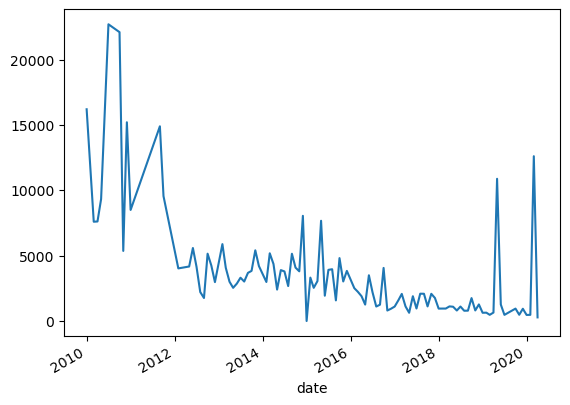

In [90]:
ts1["volume_kg"].plot()

In [111]:
adfuller(ts1["volume_kg"].diff()[1:])[1]

0.011753861494922307

In [118]:
p_values = np.zeros(len(idxs))

for i in range(len(idxs)):
    tmp = adfuller(df_train.loc[idxs[i]]["volume_kg"].diff()[1:])
    p_values[i] = tmp[1]

print("p-value: ", np.mean(p_values))

p-value:  0.007610029408994675


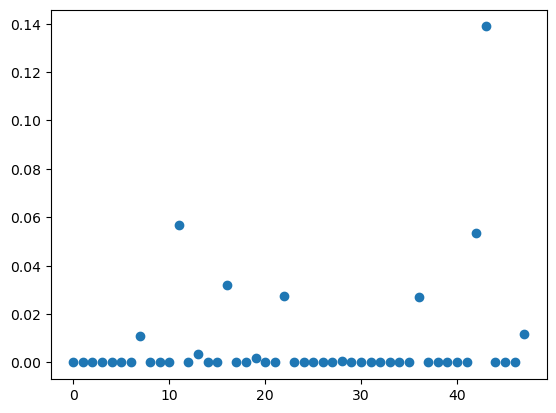

In [119]:
plt.scatter(range(len(idxs)), p_values)

In [126]:
tscv = TimeSeriesSplit()
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
